In [1]:
import numpy as np 
import os
from prepare_data import *
from RNN_CTC import *
from visualizations import *
import Levenshtein


In [2]:
train_dir = "../data/train2/audio/"
classes = os.listdir(train_dir)

In [3]:
train_list = []
for cl in classes:
    for i, file in enumerate(os.listdir(train_dir+cl+"/")):
        train_list.append(cl+"/"+file)

In [4]:
test_dir = "../data/test/audio/"
test_list = []
for i, file in enumerate(os.listdir(test_dir)):
    test_list.append(file)

In [5]:
import random
training_list = random.sample(train_list, int(len(train_list)*0.7))
val_list = list(set(train_list) - set(training_list))

In [6]:
X_train, y_train = create_sets(training_list, classes, train_dir) # takes a while

0 stop/7fc74fbe_nohash_0.wav


/Users/zuzannaglinka/DeepLearning/2024Z_DeepLearning/P2_Transformers_Speech_Classification/CTC/prepare_data.py:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],
/Users/zuzannaglinka/DeepLearning/2024Z_DeepLearning/P2_Transformers_Speech_Classification/CTC/prepare_data.py:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],


2000 happy/37dca74f_nohash_0.wav
4000 go/c578beb0_nohash_0.wav
6000 sheila/24ad3ebe_nohash_0.wav
8000 dog/d98f6043_nohash_1.wav
10000 one/61a0d340_nohash_0.wav
12000 five/4a294341_nohash_1.wav
14000 wow/81a345a3_nohash_1.wav
16000 yes/de040337_nohash_2.wav
18000 left/c6ca5d01_nohash_0.wav
20000 bird/9acd0254_nohash_0.wav
22000 seven/fce65496_nohash_0.wav
24000 two/625fd898_nohash_0.wav
26000 silence/mixed_noise_frag1_dude_miaowing_doing_the_dishes.wav
28000 bird/4fe01997_nohash_0.wav
30000 left/df1d5024_nohash_2.wav
32000 dog/be7fa0a3_nohash_0.wav
34000 bird/c08e5058_nohash_1.wav
36000 down/23abe1c9_nohash_1.wav
38000 left/5fadb538_nohash_1.wav
40000 zero/aff582a1_nohash_3.wav
42000 nine/656e8bb3_nohash_1.wav
44000 nine/9a7c1f83_nohash_3.wav
46000 happy/fad7a69a_nohash_0.wav


In [16]:
X_val, y_val = create_sets(val_list, classes, train_dir) # takes a while

0 tree/364f979f_nohash_1.wav
2000 right/b49caed3_nohash_4.wav
4000 sheila/f174517e_nohash_2.wav
6000 three/a3502f15_nohash_3.wav
8000 on/dc269564_nohash_0.wav
10000 right/964e8cfd_nohash_0.wav
12000 sheila/d2eae23d_nohash_0.wav
14000 three/72d75d96_nohash_1.wav
16000 tree/eee5e541_nohash_0.wav
18000 no/3824c00e_nohash_1.wav
20000 marvin/21e8c417_nohash_1.wav


In [14]:
np.save("../data/X_train.npy", np.expand_dims(X_train, -1)+1.3)
np.save("../data/y_train.npy", y_train.astype(np.int))
np.save('../data/X_val.npy', np.expand_dims(X_val, -1)+1.3)
np.save('../data/y_val.npy', y_val.astype(np.int))

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_16206/21952628.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.save("../data/y_train.npy", y_train.astype(np.int))


In [69]:
train_dir = "../data/train2/audio/"

X_train = np.load("../data/X_train.npy")
y_train = np.load("../data/y_train.npy")

X_val = np.load("../data/X_val.npy")
y_val = np.load("../data/y_val.npy")

In [70]:
X_train = X_train.reshape((-1, X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((-1, X_val.shape[1], X_val.shape[2]))

In [71]:
NB_CLASSES = len(classes)

In [72]:
classes_index = convert_list_dict(classes)

In [73]:
index_map = {0: '<SPACE>', 1: 'a', 2: 'b', 3: 'c',
            4: 'd', 5: 'e', 6: 'f', 7: 'g',
            8: 'h', 9: 'i', 10: 'j', 11: 'k',
            12: 'l', 13: 'm', 14: 'n', 15: 'o',
            16: 'p', 17: 'q', 18: 'r', 19: 's',
            20: 't', 21: 'u', 22: 'v', 23: 'w',
            24: 'x', 25: 'y',26: 'z', 27: "'"}

char_map = {v: k for k, v in index_map.items()}
index_map[0] = ' '

In [74]:
y_train = [int(item) for item in y_train]
y_val = [int(item) for item in y_val]

In [75]:
y_train_ = [classes_index[letter] for letter in y_train]
y_val_ = [classes_index[letter] for letter in y_val]

In [76]:
train_labels, train_input_length, train_label_length = get_ctc_params(y=[int(item) for item in y_train], classes_list=classes, char_map = char_map)
val_labels, val_input_length, val_label_length = get_ctc_params(y=[int(item) for item in y_val], classes_list=classes, char_map = char_map)

In [77]:
INPUT_SHAPE = X_train.shape[1:]
BATCH_SIZE = 64

In [29]:
!pip install keras_nlp

  Using cached keras_core-0.1.7-py3-none-any.whl.metadata (4.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 217.0 kB/s eta 0:00:00a 0:00:01
  Using cached dm_tree-0.1.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (1.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 1.4 MB/s eta 0:00:00a 0:00:01
Using cached dm_tree-0.1.8-cp310-cp310-macosx_11_0_arm64.whl (110 kB)
Using cached keras_core-0.1.7-py3-none-any.whl (950 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [40]:
import keras_nlp
edit_distance = keras_nlp.metrics.EditDistance(
    normalize=True, dtype="float32", name="edit_distance"
)


In [24]:
import tensorflow as tf
import Levenshtein as lev

def levenshtein_distance(y_true, y_pred):
    """
    Calculates the Levenshtein distance between two sequences.

    Args:
        y_true: The true sequence.
        y_pred: The predicted sequence.

    Returns:
        The Levenshtein distance between the true and predicted sequences.
    """
    # Convert sequences to strings
    true_str = tf.strings.reduce_join(tf.strings.as_string(y_true), axis=-1)
    pred_str = tf.strings.reduce_join(tf.strings.as_string(y_pred), axis=-1)

    # Compute Levenshtein distance using Levenshtein package
    def levenshtein_dist(x, y):
        return lev.distance(x, y)
    
    distances = tf.py_function(func=levenshtein_dist, inp=[true_str, pred_str], Tout=tf.int64)

    # Convert distances to float tensor
    distances_tensor = tf.cast(distances, tf.float32)

    return distances_tensor


In [48]:
import tensorflow as tf
from keras_nlp.metrics import EditDistance

def levenshtein_distance(y_true, y_pred):
    """
    Calculates the Levenshtein distance between two sequences.

    Args:
        y_true: The true sequence.
        y_pred: The predicted sequence.

    Returns:
        The Levenshtein distance between the true and predicted sequences.
    """
    # Convert sequences to strings
    true_str = tf.strings.reduce_join(tf.strings.as_string(y_true), axis=-1)
    pred_str = tf.strings.reduce_join(tf.strings.as_string(y_pred), axis=-1)

    # Create EditDistance object
    edit_distance = EditDistance()  # You can adjust the normalization as needed

    # Compute Levenshtein distance
    distance = edit_distance(y_true=true_str, y_pred=pred_str)

    return distance


In [106]:
import keras.backend as K

def edit_distance(y_true, y_pred):
    """
    Calculates the edit (Levenshtein) distance between two sequences.

    Args:
        y_true: True labels (ground truth sequences).
        y_pred: Predicted labels (predicted sequences).

    Returns:
        The edit distance between the true and predicted sequences.
    """
    # Convert sequences to sparse tensors
    y_true = K.cast(K.argmax(y_true, axis=-1), 'int32')
    y_pred = K.cast(K.argmax(y_pred, axis=-1), 'int32')
    
    # Compute edit distance
    return K.eval(keras_nlp.metrics.EditDistance(K.expand_dims(y_true, axis=1), K.expand_dims(y_pred, axis=1)))


In [121]:
def edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, : 512]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(X_val)):
            labels = y_val_[i]
            predictions = self.prediction_model.predict(X_val[i])
            edit_distances.append(edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )

In [122]:
import numpy as np
import keras
from keras.layers import Conv1D, BatchNormalization, Activation, Input, Dense, Bidirectional, LSTM, Dropout, TimeDistributed, Lambda
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from livelossplot import PlotLossesKeras
from tensorflow.keras.metrics import Recall, Precision
import keras.backend as K
import os
# edit_distance = keras_nlp.metrics.EditDistance()
class RNN_CTC():

    def __init__(self, input_shape, nb_classes, weights_directory='./', nb_epochs=100, batch_size=64):
        self.input_shape = input_shape
        self.nb_classes = nb_classes
        self.weights_directory = weights_directory
        self.nb_epochs = nb_epochs
        self.batch_size = batch_size
        self.m = None
        self.tm = None    
        
        self.build()
        
    def ctc_layer_func(self, args):
        y_pred, labels, input_length, label_length = args
        return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
    
    def ctc_loss(self, y_true, y_pred):
        return y_pred
        
    def build(self, conv_filters=128, conv_size=12, conv_strides=4, activation="relu", rnn_layers=2, lstm_units=64, drop_out=0.6):   
        
        inputs = Input(shape=self.input_shape, name='input')
        x = Conv1D(conv_filters, 
                   conv_size, 
                   strides = conv_strides, 
                   name = 'conv1d')(inputs)
        x = BatchNormalization()(x)
        x = Activation(activation)(x)
        for _ in range(rnn_layers):          
            x = Bidirectional(LSTM(lstm_units, 
                                   return_sequences = True))(x)
            x = Dropout(drop_out)(x)
            x = BatchNormalization()(x)
        outputs = TimeDistributed(Dense(self.nb_classes, activation="softmax"))(x)
        
        labels = Input(name="the_labels", shape=[None,], dtype="int32")
        input_length = Input(name="input_length", shape=[1], dtype="int32")
        label_length = Input(name="label_length", shape=[1], dtype="int32")
        
        ctc_layer = Lambda(self.ctc_layer_func, output_shape=(1,), name="ctc")([outputs, labels, input_length, label_length])
        self.tm = Model(inputs=inputs, outputs=outputs)
        self.m = Model(inputs=[inputs,labels,input_length,label_length],
                       outputs=ctc_layer)            
        
        self.m.compile(loss=self.ctc_loss, 
                       optimizer=Adam(),
                    #    metrics=[ edit_distance]
                       )
        
        self.tm.compile(loss=self.ctc_loss, 
                        optimizer=Adam())
              
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                                      factor=0.5, 
                                      patience=int(self.nb_epochs/20),
                                      min_lr=0.0001)
        
        file_path = os.path.join(self.weights_directory,"ctc_best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path, 
                                           monitor='val_loss',
                                           mode="max",
                                           save_best_only=True)
        
        early_stopping = EarlyStopping(monitor="val_loss", 
                                       mode="max", 
                                       verbose=1, 
                                       patience=int(self.nb_epochs/10))
        plotlosses = PlotLossesKeras()
        self.callbacks = [reduce_lr, model_checkpoint, early_stopping, plotlosses]
     
        print(self.m.summary())
        print(self.tm.summary())
        
        return self.m, self.tm
    
    
    def fit(self, X_train, train_labels, train_input_length, train_label_length, y_train,
                  X_val, val_labels, val_input_length, val_label_length, y_val, callbacks):       

        hist = self.m.fit([np.squeeze(X_train), 
                            train_labels, 
                            train_input_length, 
                            train_label_length], 
                       np.zeros([len(y_train)]), 
                       batch_size = self.batch_size, 
                       epochs = self.nb_epochs, 
                       validation_data = ([np.squeeze(X_val), 
                                           val_labels, 
                                           val_input_length, 
                                           val_label_length],
                                          np.zeros([len(y_val)])), 
                       callbacks = callbacks, 
                       verbose = 1, 
                       shuffle = True,
                    )
        
        keras.backend.clear_session()
        return hist
    
    def str_out(self, dataset, index_map):
        k_ctc_out = K.ctc_decode(self.tm.predict(np.squeeze(dataset), 
                                                verbose = 1), 
                             np.array([28 for _ in dataset]))
        decoded_out = K.eval(k_ctc_out[0][0])
        str_decoded_out = []
        for i, _ in enumerate(decoded_out):     
            str_decoded_out.append("".join([index_map[c] for c in decoded_out[i] if not c == -1]))

        return str_decoded_out

In [93]:
def create_sparse(ten):
	n = len(ten)
	ind = [[xi, 0, yi] for xi,x in enumerate(ten) for yi,y in enumerate(x)]
	chars = list(''.join(ten))
	return tf.SparseTensorValue(ind, chars, [n,1,1])

def edit_distance(y_true,y_pred):
	return tf.edit_distance(create_sparse(y_pred), create_sparse(y_true), normalize=True)

In [123]:
WEIGHTS_DIR = "./"
sr_ctc = RNN_CTC(INPUT_SHAPE, NB_CLASSES, WEIGHTS_DIR, nb_epochs=150, batch_size=BATCH_SIZE,
)

Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 122, 85)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 28, 128)              130688    ['input[0][0]']               
                                                                                                  
 batch_normalization_66 (Ba  (None, 28, 128)              512       ['conv1d[0][0]']              
 tchNormalization)                                                                                
                                                                                                  
 activation_22 (Activation)  (None, 28, 128)              0         ['batch_normalization_6

In [124]:
edit_distance_callback = EditDistanceCallback(sr_ctc)


In [125]:
history = sr_ctc.fit(X_train, train_labels, train_input_length, train_label_length, y_train,
                     X_val, val_labels, val_input_length, val_label_length, y_val,
                       callbacks=[edit_distance_callback],)

TypeError: RNN_CTC.fit() got an unexpected keyword argument 'callbacks'

In [77]:
available_classes = [i for i in classes if '.' not in i]

In [78]:
available_classes

['right',
 'eight',
 'cat',
 'tree',
 'bed',
 'happy',
 'go',
 'silence',
 'dog',
 'no',
 'wow',
 'nine',
 'left',
 'stop',
 'three',
 'sheila',
 'one',
 'bird',
 'zero',
 'seven',
 'up',
 'marvin',
 'two',
 'house',
 'down',
 'six',
 'yes',
 'on',
 'five',
 'off',
 'four']

In [79]:
def predict(X):
    y = sr_ctc.str_out(X, index_map)
    preds = [min(available_classes, key=lambda l: Levenshtein.distance(l, y[i])).lower() for i in range(len(y))]
    return preds

In [139]:
preds = predict(X_val)

628/628 [==============================] - 10s 16ms/step


In [80]:
preds_1 = predict(X_val)

628/628 [==============================] - 12s 17ms/step


In [84]:
y_val_ = [classes[y_val[i]] for  i in range(len(y_val))]

In [85]:
print('PREDICTED: \t REAL:')
for i in range(100):
    print(preds_1[i], '\t\t',classes[y_val[i]])

PREDICTED: 	 REAL:
sheila 		 sheila
nine 		 nine
sheila 		 sheila
right 		 right
five 		 five
tree 		 tree
bed 		 one
go 		 zero
on 		 no
up 		 four
go 		 silence
yes 		 yes
marvin 		 marvin
nine 		 nine
go 		 silence
sheila 		 sheila
on 		 no
eight 		 eight
go 		 silence
zero 		 zero
cat 		 bird
marvin 		 marvin
wow 		 wow
house 		 house
one 		 dog
on 		 no
on 		 go
bed 		 bed
bed 		 one
cat 		 cat
go 		 cat
right 		 right
house 		 house
on 		 go
zero 		 zero
no 		 on
two 		 two
stop 		 stop
bed 		 one
nine 		 marvin
stop 		 stop
on 		 zero
bed 		 bed
eight 		 eight
seven 		 seven
zero 		 zero
bed 		 one
no 		 on
marvin 		 marvin
go 		 wow
seven 		 seven
eight 		 eight
bed 		 bed
tree 		 tree
two 		 two
cat 		 cat
left 		 left
on 		 no
left 		 left
two 		 two
bed 		 bed
left 		 left
cat 		 cat
tree 		 tree
six 		 six
go 		 five
right 		 right
nine 		 nine
go 		 up
stop 		 stop
zero 		 zero
marvin 		 marvin
eight 		 eight
no 		 on
left 		 left
bed 		 bird
bed 		 down
bird 		 bird
bed 	

In [97]:
classes_to_index = dict([(val, k) for k, val in classes_index.items()])


Accuracy:  0.6735872541697785
Precision::  0.6735872541697785
Recall::  0.6735872541697785
F1_Score::  0.6735872541697785

Confusion Matrix

Classification Report
              precision    recall  f1-score   support

       right       0.31      0.91      0.46       497
       eight       1.00      0.67      0.80       541
         cat       0.85      0.95      0.90       517
        tree       0.91      0.45      0.61       544
         bed       0.98      0.78      0.87       682
       happy       0.98      0.94      0.96       721
          go       0.97      0.91      0.94       701
     silence       0.99      0.88      0.93       696
         dog       0.02      0.07      0.03       720
          no       1.00      0.98      0.99       535
         wow       1.00      0.96      0.98       497
        nine       0.98      0.93      0.95       669
        left       0.99      0.91      0.95       517
        stop       0.96      0.88      0.91       713
       three       0.01   

/Users/zuzannaglinka/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zuzannaglinka/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zuzannaglinka/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

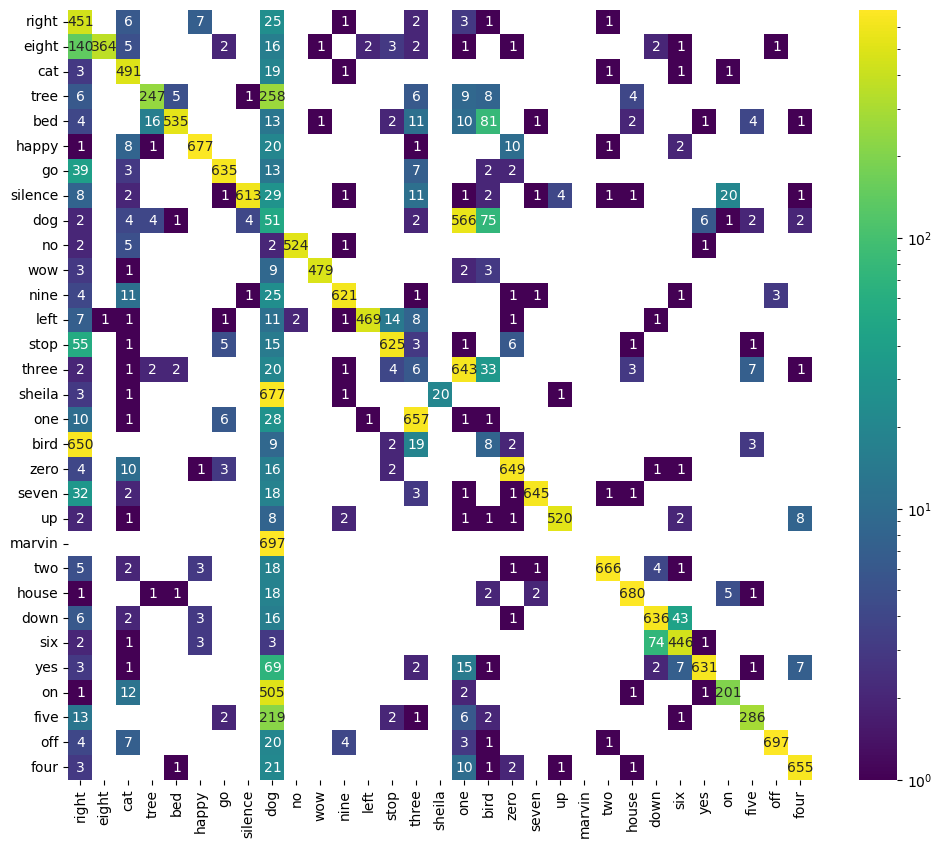

In [87]:
print_score(preds_1, y_val_,classes_to_index)

Accuracy:  0.6735872541697785
Precision::  0.6735872541697785
Recall::  0.6735872541697785
F1_Score::  0.6735872541697785

Confusion Matrix

Classification Report
              precision    recall  f1-score   support

       right       0.31      0.91      0.46       497
       eight       1.00      0.67      0.80       541
         cat       0.85      0.95      0.90       517
        tree       0.91      0.45      0.61       544
         bed       0.98      0.78      0.87       682
       happy       0.98      0.94      0.96       721
          go       0.97      0.91      0.94       701
     silence       0.99      0.88      0.93       696
         dog       0.02      0.07      0.03       720
          no       1.00      0.98      0.99       535
         wow       1.00      0.96      0.98       497
        nine       0.98      0.93      0.95       669
        left       0.99      0.91      0.95       517
        stop       0.96      0.88      0.91       713
       three       0.01   

/Users/zuzannaglinka/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zuzannaglinka/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zuzannaglinka/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

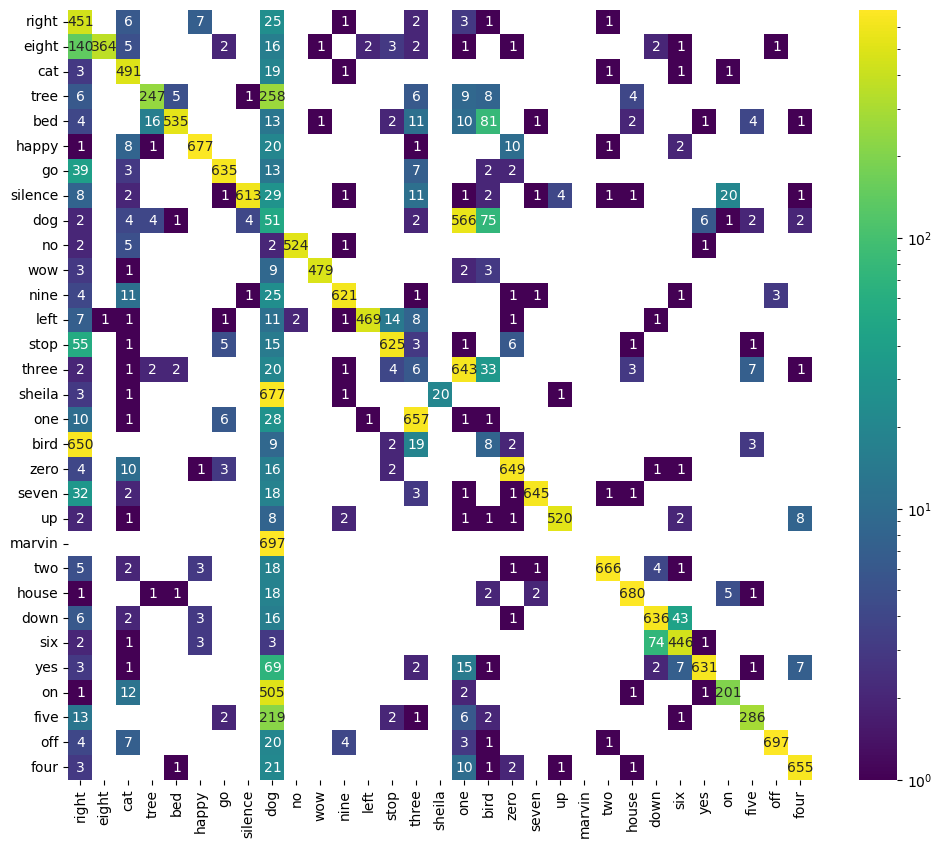

In [88]:
print_score(preds_1, y_val_,classes_to_index)

In [89]:
new_preds = classify_as_unknwn(preds_1)
new_y_val = classify_as_unknwn(y_val_)


In [90]:

new_preds[:10]

['unknown',
 'unknown',
 'unknown',
 'right',
 'unknown',
 'unknown',
 'unknown',
 'go',
 'on',
 'up']

In [91]:
prediction_with_unknown = sum(np.array(new_preds) == np.array(new_y_val))/len(new_y_val)
prediction_with_unknown

0.7370176748817525

In [92]:
prediction_all_class = sum(np.array(preds_1) == np.array(y_val_))/len(y_val_)
prediction_all_class

0.6735872541697785

In [93]:
label_encoder = {'yes':1, 'no':2, 'up':3, 'down':4, 'left':5, 'right':6, 'on':7, 'off':8, 'stop':9, 'go':10, 'silence':11, 'unknown':12}

Accuracy:  0.7370176748817525
Precision::  0.7370176748817525
Recall::  0.7370176748817525
F1_Score::  0.7370176748817525

Confusion Matrix


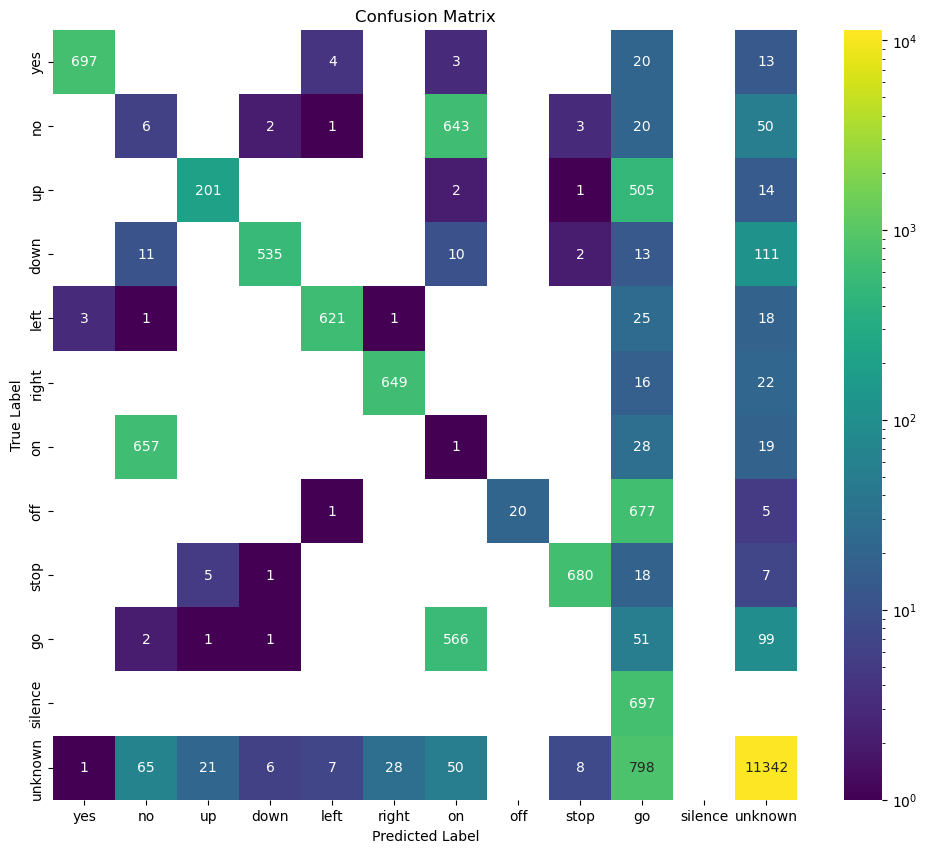


Classification Report
              precision    recall  f1-score   support

         yes       0.98      0.78      0.87       682
          no       0.02      0.07      0.03       720
          up       0.98      0.93      0.95       669
        down       0.01      0.01      0.01       725
        left       1.00      0.03      0.06       703
       right       0.00      0.00      0.00       705
          on       0.96      0.94      0.95       687
         off       0.00      0.00      0.00       697
        stop       0.98      0.96      0.97       711
          go       0.97      0.92      0.94     12326
     silence       0.88      0.28      0.42       723
     unknown       0.99      0.95      0.97       737

    accuracy                           0.74     20085
   macro avg       0.65      0.49      0.51     20085
weighted avg       0.83      0.74      0.76     20085



/Users/zuzannaglinka/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zuzannaglinka/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zuzannaglinka/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [95]:
print_score(new_preds, new_y_val,label_encoder)

In [96]:

for i in range(0, len(test_list), 10000):
    X_test = np.zeros([len(test_list[i:i+10000]), 122, 85])
    for ind, file in enumerate(test_list[i:i+10000]):
        if '.DS_Store' in file:
            continue
        try:
            X_test[ind] = make_spec(file, test_dir)
        except:
            print(ind, file)
            continue
    y_test = classify_as_unknwn(predict(X_test))
    df = pd.DataFrame({'fname':test_list[i:i+10000], 'label':y_test})
    df.to_csv('./y_test_ctc.csv', mode='a', index=False, header=False)


/Users/zuzannaglinka/DeepLearning/2024Z_DeepLearning/P2_Transformers_Speech_Classification/CTC/prepare_data.py:14: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  if len(sig) < 16000:


267/267 [==============================] - 5s 17ms/step
